# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [37]:
# python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import flatiron_stats as fs

import warnings
warnings.filterwarnings("ignore")

# load dataset
df = pd.read_csv('multipleChoiceResponses_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [26]:
df.describe()

,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,CompensationAmount,exchangeRate,AdjustedCompensation
count,16236.000000,16253.000000,16238.000000,16249.000000,16253.000000,16221.000000,10657.000000,10655.000000,10644.000000,10656.000000,10650.000000,10640.000000,5.178000e+03,4499.000000,4.343000e+03
mean,33.596945,25.814680,13.760184,21.133270,4.467212,1.449728,35.680304,27.455279,10.007657,13.639968,9.249953,2.254041,4.129494e+07,0.703416,6.636071e+06
std,23.781350,24.558786,17.845975,23.784604,10.186693,8.437395,19.364950,17.450835,10.458430,9.947624,12.429025,10.302431,1.965335e+09,0.486681,4.293996e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,0.000030,-7.351631e+01
25%,20.000000,10.000000,0.000000,0.000000,0.000000,0.000000,25.000000,15.000000,5.000000,10.000000,0.000000,0.000000,5.000000e+04,0.058444,2.036942e+04
50%,30.000000,20.000000,10.000000,15.000000,0.000000,0.000000,30.000000,30.000000,10.000000,10.000000,5.000000,0.000000,9.000000e+04,1.000000,5.381217e+04
75%,50.000000,35.000000,20.000000,40.000000,5.000000,0.000000,50.000000,40.000000,10.000000,15.000000,15.000000,0.000000,1.900000e+05,1.000000,9.566608e+04
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000,1.000000e+11,2.652053,2.829740e+10


In [27]:
df.head(4)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [28]:
# inspect the FormalEducaton column
df['FormalEducation'].value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [29]:
# inspect the AdjustedCompensation column
df['AdjustedCompensation'].describe()

count    4.343000e+03
mean     6.636071e+06
std      4.293996e+08
min     -7.351631e+01
25%      2.036942e+04
50%      5.381217e+04
75%      9.566608e+04
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64

In [30]:
print('%.0f records with no salary data' %len(df[df['AdjustedCompensation'].isnull()]))

22051 records with no salary data


In [31]:
print('%.0f records with a salary < $1,000' %len(df[df['AdjustedCompensation'] < 1000]))

235 records with a salary < $1,000


In [32]:
'''
Null hypothesis:
Data scientists with Master degrees do not have a higher mean annual salary than those with only Bachelor degree.

Alternative hypothesis:
Data scientists with a Masters degree have a higher mean salary than those with only a Bachelors degree.
'''

'''
Pseudocode
1. assign variables bachelor and master to their respective 
'''
# Subset dataframes to collect only masters and bachelor degree earners
# Keep values between 1,000 and 500,000 from dataframes
outlier_threshold = 500000
df = df[~df['AdjustedCompensation'].isnull()] # remove null values
subset = df[(df['AdjustedCompensation'] > 1000) & (df['AdjustedCompensation'] < outlier_threshold)]
doctorate = subset.loc[df['FormalEducation'] == "Doctoral degree", 'AdjustedCompensation']
masters = subset.loc[subset['FormalEducation'] == "Master's degree", 'AdjustedCompensation']
bachelor = subset.loc[subset['FormalEducation'] == "Bachelor's degree", 'AdjustedCompensation']

Bacehlor sample size: 1024
Bachelor range: 1015.3 : 470000.0
Bacehlor mean: 57859
Bacehlor stdev: 55281
Master's sample size: 1876
Master's range: 1026.0 : 459000.0
Master's mean: 67408
Master's stdev: 53797
Doctorate's range: 1145.5 : 400000.0
Doctorate's mean: 89334
Doctorate's stdev: 64346


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

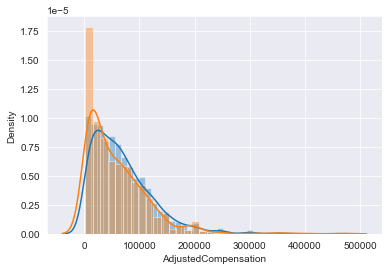

In [33]:
# Create table showing sample size, mean, and standard deviation
print("Bacehlor sample size: %.0f" %len(bachelor))
print("Bachelor range:", bachelor.min(), ":", bachelor.max())
print("Bacehlor mean: %.0f" %bachelor.mean())
print("Bacehlor stdev: %.0f" %bachelor.std())
print("Master's sample size: %.0f" %len(masters))
print("Master's range:", masters.min(), ":", masters.max())
print("Master's mean: %.0f" %masters.mean())
print("Master's stdev: %.0f" %masters.std())
print("Doctorate's range:", doctorate.min(), ":", doctorate.max())
print("Doctorate's mean: %.0f" %doctorate.mean())
print("Doctorate's stdev: %.0f" %doctorate.std())

sns.distplot(masters)
sns.distplot(bachelor)

In [44]:
# perform 1-sided Welch's t-test for unequal sample sizes and variances
results = stats.ttest_ind(masters, bachelor, equal_var=False)#, alternative='greater')
results.pvalue/2

3.787700762077486e-06

In [41]:
def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. This function returns the degrees of freedom """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator


def p_value_welch_ttest(a, b, two_sided=False):
    """Calculates the p-value for Welch's t-test given two samples.
    By default, the returned p-value is for a one-sided t-test. 
    Set the two-sided parameter to True if you wish to perform a two-sided t-test instead.
    """
    t = welch_t(a, b)
    df = welch_df(a, b)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p

In [42]:
p_value_welch_ttest(masters, bachelor, two_sided=False)

3.7877007621478498e-06

#### Results and Conclusions
The p-value is greater than the critical alpha-value of 0.05 thus we must accept the null hypothesis that master's degree holders do not have a higher salary than bachelor degree holders.

This result may be due to outliers in the data as there may be many people reporting that they do not make a salary and some reporting a very high salary. I will set a threshold of removing 0 values and those above 500,000.

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [45]:
# perform 1-sided Welch's t-test for unequal sample sizes and variances
results = stats.ttest_ind(doctorate, bachelor, equal_var=False)#, alternative='greater')
results.pvalue/2

4.1792461171450666e-30

In [46]:
p_value_welch_ttest(doctorate, bachelor)

0.0

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [ ]:
# ANOVA for multiple comparisons
formula = 

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!